# Gravitational Waves in General Relativity  II - The Reflexion of Cylindrical Waves by Marder
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

Gravitational Waves in General Relativity. II. The Reflexion of Cylindrical Waves by Marder.  Equation 15 of this paper, the Rosen metric, corresponds to equation 10 of paper I.

https://royalsocietypublishing.org/doi/abs/10.1098/rspa.1958.0111z

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz,gamma,psi,mu = symbols( 't r phi z dt dr dphi dz gamma psi mu ' ) 

In [4]:
gamma = Function('gamma')(r,t)
gamma

In [5]:
psi = Function('psi')(r,t)
psi

In [6]:
mu = Function('mu')(r,t)
mu

In [7]:
variables = Matrix( [t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [28]:
lineElement = expand(exp(2*(gamma-psi)) * ( dt**2 - dr**2) - r**2 * exp(-2*psi) * dphi**2 - exp(2*(psi)) * dz**2)
lineElement 

In [29]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(r, t)  -2⋅ψ(r, t)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(r, t)             ⎥
⎢          0                        0             -r ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(r, t)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [30]:
import sympy

In [31]:
m = sympy.Array(g)
m

⎡ 2⋅γ(r, t)  -2⋅ψ(r, t)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅ψ(r, t)             ⎥
⎢          0                        0             -r ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅ψ(r, t)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [32]:
from einsteinpy.symbolic import *

In [33]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [34]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                      
⎢⎢∂t            ∂t           ∂r            ∂r                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                      
⎢⎢∂r            ∂r           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                        2  -2⋅γ(r, t) ∂                   
⎢⎢            0                          0              -r ⋅ℯ          ⋅──(ψ(r, t))         
⎢⎢                                                                    

In [35]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡    ⎛    2              2              2                           2     2         ⎞       
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂   
⎢- r⋅⎜- ───(γ(r, t)) + ───(γ(r, t)) + ───(ψ(r, t)) + 2⋅⎜──(ψ(r, t))⎟  - ───(ψ(r, t))⎟ + ──(γ
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r  
⎢    ⎝  ∂r             ∂t             ∂r                                ∂t          ⎠       
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                       r                                   
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                 ∂   

In [18]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                                                           
⎢                                                                         2                 
⎢    ∂           ∂                 ∂           ∂             ⎛∂          ⎞        ∂         
⎢1.0⋅──(γ(r, t))⋅──(μ(r, t)) + 1.0⋅──(γ(r, t))⋅──(μ(r, t)) - ⎜──(μ(r, t))⎟  - 2.0⋅──(μ(r, t)
⎢    ∂r          ∂r                ∂t          ∂t            ⎝∂r         ⎠        ∂r        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            ∂           ∂             ∂           ∂             ∂           ∂              
⎢            ──(γ(r, t))⋅──(μ(r, t)) + ──(γ(r, t))⋅──(μ(r, t)) - ──(μ(

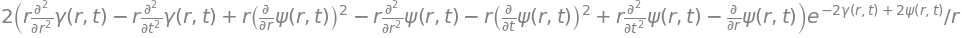

In [36]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [21]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

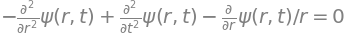

In [63]:
fieldEquation1 = Eq(expand((-1/r)*simplify(Ric.tensor())[2,2].args[1]),0)
fieldEquation1

In [65]:
fieldEquation2 = Eq(diff(gamma,t),solve( simplify(Ric.tensor())[0,1], diff(gamma,t) )[0])
fieldEquation2

In [66]:
fieldEquation3 = Eq(diff(gamma,r),solve( simplify(simplify(Ric.tensor())[0,0].args[1] + simplify(Ric.tensor())[1,1].args[1]) , diff(gamma,r))[0])
fieldEquation3

In [68]:
fieldEquations = Matrix([fieldEquation1,fieldEquation2,fieldEquation3])
fieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(r, t))     ⎥
⎢    ∂              ∂             ∂r              ⎥
⎢ - ───(ψ(r, t)) + ───(ψ(r, t)) - ─────────── = 0 ⎥
⎢     2              2                 r          ⎥
⎢   ∂r             ∂t                             ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(r, t)) = 2⋅r⋅──(ψ(r, t))⋅──(ψ(r, t))    ⎥
⎢    ∂t                ∂r          ∂t             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(r, t)) = r⋅⎜⎜──(ψ(r, t))⎟  + ⎜──(ψ(r, t))⎟ ⎟⎥
⎣∂r              ⎝⎝∂r         ⎠    ⎝∂t         ⎠ ⎠⎦